In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df=pd.read_csv('declinestats.csv')

In [4]:
df1=pd.read_csv('cleanData.csv')

In [5]:
newData=df1[['loan_amnt','title','fico_range_low','dti','zip_code','addr_state','emp_length','policy_code','set','timestamp']]

In [6]:
newData=newData.append(df,ignore_index=True)

In [7]:
newData['yStatus'] = newData['set'].apply(lambda x: 1 if x == "accepted" else 0)

In [8]:
def elength(a):
    if (a=='n/a'):
        return 0
    elif (a=='10+ years'):
        return 10
    elif (a=='1 year'):
        return 1
    elif (a=='< 1 year'):
        return 0.5
    else:
        return float(a.strip(' years'))
    
newData['yemp_length'] = newData['emp_length'].map(lambda a: elength(a))

In [9]:
colsToKeep=['loan_amnt','fico_range_low','dti','yemp_length','policy_code']

In [10]:
x=newData[colsToKeep]

In [11]:
y=newData['yStatus']

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neural_network import MLPClassifier

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(60,30,10),activation='relu',solver='adam',learning_rate='adaptive',verbose=False)

In [20]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 30, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
y_pred = mlp.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3224991       0]
 [      0  303822]]


In [24]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = mlp.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

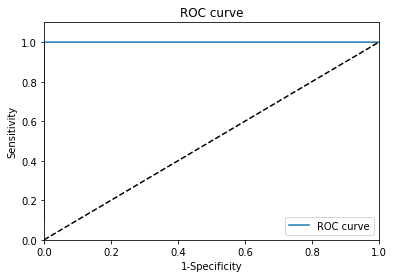

In [25]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()